In [25]:
import pandas as pd

data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0504/gpt/train/use gpt/gpt train data.csv",index_col=0)

data_row

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,predict
0,0.038604,-0.082635,-0.025031,-0.009259,-0.037050,-0.003862,-0.006778,0.010718,0.055397,0.015627,...,-0.004241,-0.030870,0.027288,-0.000492,-0.031339,0.007556,-0.003035,-0.026025,-0.027255,0
1,0.009535,-0.092711,-0.021728,0.003174,-0.043094,-0.013430,-0.028936,0.021206,0.027820,0.030740,...,0.011536,-0.047857,0.022400,0.014760,-0.001493,0.015786,-0.011461,-0.023641,-0.020555,0
2,0.072568,-0.021928,-0.028715,0.010968,-0.016436,0.019318,-0.028618,0.024367,0.073314,0.017195,...,0.024505,0.005451,0.010996,-0.018153,-0.052474,0.018975,0.012139,0.006258,-0.047037,2
3,0.052137,-0.062826,-0.026814,-0.008295,-0.006293,0.022810,-0.051617,0.037246,0.054489,0.025517,...,0.000140,-0.033439,0.016394,-0.004223,-0.018451,0.004078,-0.023644,-0.014932,-0.039621,0
4,0.000232,-0.087080,-0.027980,0.007333,-0.036042,-0.002588,-0.018051,0.026080,0.041807,0.032775,...,0.032299,-0.013122,0.018584,0.015801,0.018275,-0.000458,-0.022250,-0.042122,-0.049692,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.111050,-0.059659,-0.023418,0.033797,0.027228,0.018999,-0.022130,0.032211,0.079843,-0.015568,...,0.003915,0.007383,0.018199,-0.035059,-0.061663,0.005643,0.020122,-0.001655,-0.014250,1
2996,-0.005753,-0.127383,-0.014248,0.011894,-0.032286,0.002237,-0.010651,0.019110,0.027012,0.032973,...,0.016557,-0.044870,0.020826,0.016989,0.020996,0.006576,-0.033846,-0.061803,-0.035580,0
2997,0.004518,-0.104862,-0.022002,-0.008290,-0.052936,-0.011232,-0.001211,0.011662,0.032741,0.027996,...,0.020504,-0.045838,0.019045,0.011956,0.002006,0.009956,-0.017040,-0.037410,-0.024063,0
2998,-0.001838,-0.071249,-0.012469,0.016707,0.006422,-0.007729,-0.078304,0.047784,0.051174,0.015257,...,-0.006728,-0.020589,-0.000294,0.000908,-0.037034,0.007502,-0.014855,-0.009208,-0.031131,0


In [26]:

import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")
device = torch.device("mps")  # MPS 장치 사용

tensor([1.], device='mps:0')


In [27]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [28]:
# 데이터 불러오기 및 전처리
data_row = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0504/gpt/train/use gpt/gpt train data.csv", index_col=0)
y_train = pd.get_dummies(data_row['predict']).values
X_train = data_row.drop(columns=['predict']).values

test = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0504/gpt/test/use gpt/gpt test data.csv", index_col=0)
test_y = pd.get_dummies(test['predict']).values
test_x = test.drop(columns=['predict']).values

In [29]:

X_train = torch.tensor(X_train, dtype=torch.float).unsqueeze(1).to(device)
y_train = torch.tensor(y_train, dtype=torch.float).to(device)
test_x = torch.tensor(test_x, dtype=torch.float).unsqueeze(1).to(device)
test_y = torch.tensor(test_y, dtype=torch.float).to(device)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([3000, 1, 768])
torch.Size([3000, 3])
torch.Size([300, 1, 768])
torch.Size([300, 3])


In [31]:

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)

test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, shuffle=False)

In [32]:
import math
import torch
from torch.optim.optimizer import Optimizer

class PADAM(Optimizer):
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, partial=1/4):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))

        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay, partial=partial)
        super(PADAM, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError('PADAM does not support sparse gradients')

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p.data)
                    state['exp_avg_sq'] = torch.zeros_like(p.data)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                if group['weight_decay'] != 0:
                    grad = grad.add(p.data, alpha=group['weight_decay'])

                exp_avg.mul_(beta1).add_(grad, alpha=1-beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1-beta2)

                denom = exp_avg_sq.sqrt().add_(group['eps'])
                step_size = group['lr'] * math.pow(state['step'], -group['partial'])

                p.data.addcdiv_(exp_avg, denom, value=-step_size)

        return loss

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class TextClassifier(nn.Module):
    def __init__(self):
        super(TextClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=X_train.shape[2], out_channels=128, kernel_size=2, padding=1)  # 채널 수와 커널 사이즈 조정
        self.bn1 = nn.BatchNorm1d(128)  # 배치 정규화 추가
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=2, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=2, padding=1)
        self.bn3 = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.25)  # 드롭아웃 비율 조정
        self.lstm = nn.LSTM(input_size=32, hidden_size=128, num_layers=2, batch_first=True, bidirectional=True)  # LSTM 구조 보강
        self.fc1 = nn.Linear(128*2, 32)  # Fully connected 레이어의 크기 조정
        self.fc2 = nn.Linear(32, 3)
        self.activation = nn.ReLU()  # 활성화 함수 변경

    def forward(self, x):
        x = self.bn1(self.activation(self.conv1(x)))
        x = self.pool(x)
        x = self.bn2(self.activation(self.conv2(x)))
        x = self.pool(x)
        x = self.bn3(self.activation(self.conv3(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model = TextClassifier().to(device)
model.to(device)

TextClassifier(
  (conv1): Conv1d(768, 128, kernel_size=(2,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(128, 64, kernel_size=(2,), stride=(1,), padding=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(64, 32, kernel_size=(2,), stride=(1,), padding=(1,))
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (lstm): LSTM(32, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=256, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=3, bias=True)
  (activation): ReLU()
)

In [34]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = PADAM(model.parameters(), lr=0.002,weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=3, verbose=True)

/opt/anaconda3/envs/conda_cpu/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [35]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

def save_checkpoint(state, filename="my_checkpoint.pt"):
    print("=> Saving checkpoint")
    torch.save(state, filename)

In [36]:
num_epochs = 500
training_losses = []
validation_losses = []


patience = 20  
counter = 0  
best_loss = None  

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # 데이터를 MPS 장치로 이동
        inputs = inputs.permute(0, 2, 1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    avg_train_loss = train_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    
   
    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device) 
            inputs = inputs.permute(0, 2, 1)  
            outputs = model(inputs)
            loss = criterion(outputs, torch.max(labels, 1)[1])
            validation_loss += loss.item()
    
    avg_validation_loss = validation_loss / len(test_loader)
    validation_losses.append(avg_validation_loss)

    print(f'Epoch {epoch+1}, Training Loss: {avg_train_loss}, Validation Loss: {avg_validation_loss}')
    
    scheduler.step(avg_validation_loss)
    
    if best_loss is None:
        best_loss = avg_validation_loss
        save_checkpoint({'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()})
    elif avg_validation_loss < best_loss:
        best_loss = avg_validation_loss
        save_checkpoint({'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()})
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping!")
            break

print('Test Fine End')



Epoch 1, Training Loss: 0.544367977976799, Validation Loss: 0.6200672392081469
=> Saving checkpoint
Epoch 2, Training Loss: 0.40861684729655584, Validation Loss: 0.7094629396579694
Epoch 3, Training Loss: 0.38514795154333115, Validation Loss: 0.6728994020648922
Epoch 4, Training Loss: 0.3585440658032894, Validation Loss: 0.4923241532566802
=> Saving checkpoint
Epoch 5, Training Loss: 0.3398469820618629, Validation Loss: 0.6275743785892458
Epoch 6, Training Loss: 0.31894546151161196, Validation Loss: 0.8197363901010248
Epoch 7, Training Loss: 0.30388150587677953, Validation Loss: 0.8413226693338948
Epoch 8, Training Loss: 0.28015175511439644, Validation Loss: 0.7365344830155178
Epoch 9, Training Loss: 0.2625775954375664, Validation Loss: 0.8907146797233145
Epoch 10, Training Loss: 0.2416621578236421, Validation Loss: 0.7221595760133156
Epoch 11, Training Loss: 0.23272316915293534, Validation Loss: 0.9228898743830359
Epoch 12, Training Loss: 0.20367761136343082, Validation Loss: 1.091943

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

torch.save(model.state_dict(), 'pytorch cnn-bilstm model_state_dict0424.pt')

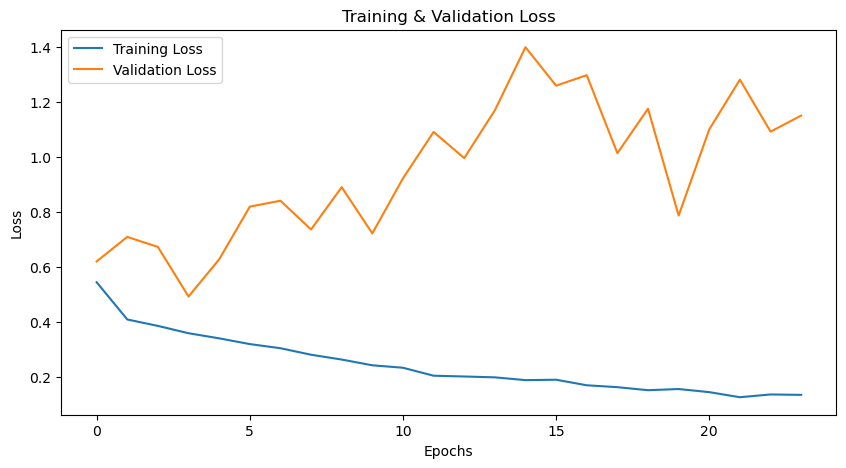

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

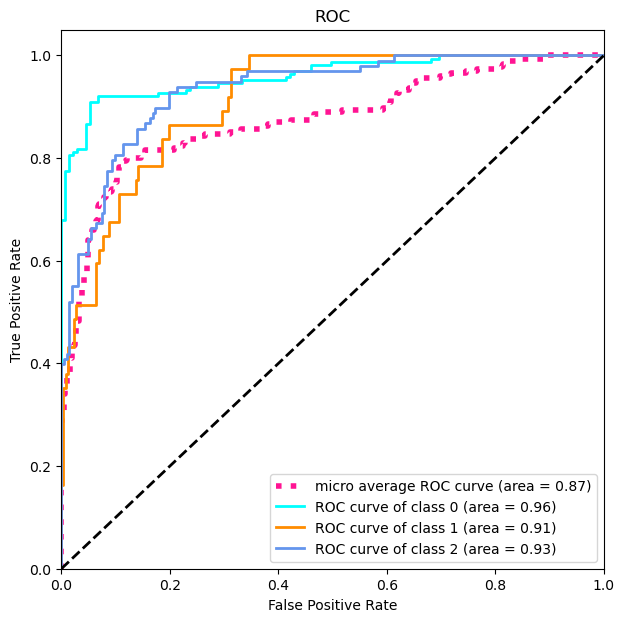

In [39]:

def plot_multiclass_roc_curve(test_y, y_score, n_classes):
   
    test_y_bin = label_binarize(test_y, classes=[*range(n_classes)])

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

   
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

   
    plt.figure(figsize=(7, 7))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()





from sklearn.preprocessing import label_binarize

test_x = test_x.permute(0, 2, 1) 
y_score = model(test_x).detach().cpu().numpy()

test_y = test_y.detach().cpu().numpy()

plot_multiclass_roc_curve(test_y, y_score, n_classes=3)

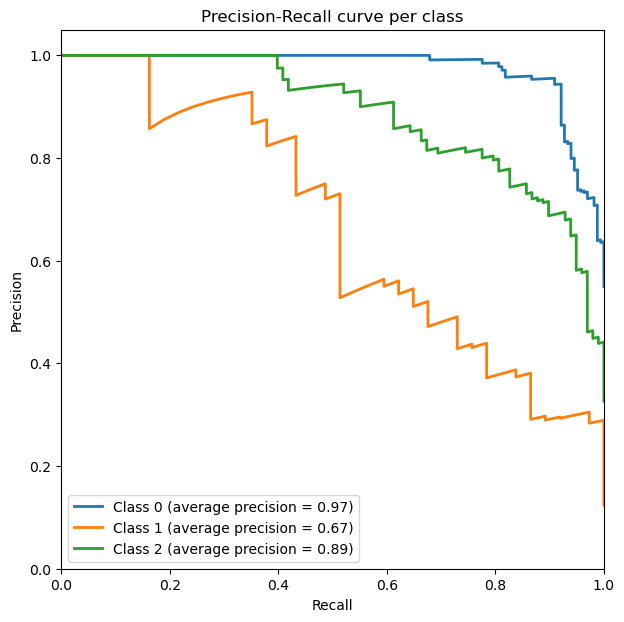

In [40]:
def plot_precision_recall_curve(test_y, y_score, n_classes):
    
    test_y = label_binarize(test_y, classes=[*range(n_classes)])
    
   
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(test_y[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(test_y[:, i], y_score[:, i])

    
    plt.figure(figsize=(7, 7))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (average precision = {average_precision[i]:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve per class')
    plt.legend(loc="best")
    plt.show()
    
plot_precision_recall_curve(test_y, y_score, n_classes=3)

In [41]:

y_pred = np.argmax(y_score, axis=1)
test_y_labels = np.argmax(test_y, axis=1)  # 실제 레이블

In [42]:

accuracy = accuracy_score(test_y_labels, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7766666666666666


In [43]:
# 혼동 행렬
conf_matrix = confusion_matrix(test_y_labels, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[124  12  29]
 [  0  18  19]
 [  1   6  91]]


In [44]:
with open("CNN BILSTM confusion matrix.txt", "w") as text_file:
    print(confusion_matrix(test_y_labels, y_pred), file=text_file)

In [45]:
# 분류 보고서
class_report = classification_report(test_y_labels, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.86       165
           1       0.50      0.49      0.49        37
           2       0.65      0.93      0.77        98

    accuracy                           0.78       300
   macro avg       0.72      0.72      0.71       300
weighted avg       0.82      0.78      0.78       300



In [46]:
with open("CNN-BILSTM output.txt", "w") as text_file:
    print(classification_report(test_y_labels, y_pred,digits=4), file=text_file)